# <center>Homework: Comparing the running time between C++, Python and Numpy </center>
`Name`: Nguyen Khanh Nhan <br>
`Student ID`: 21127657 <br>
`Class`: 21KHDL1


---

## Contents
* [1. Introduction](#c1)
* [2. The structure of the program](#c2)
* [3. The running time of mutiplying 2 matrices](#c3)
    * [3.1. The running time of C++](#c31)
    * [3.2. The running time of Python](#c32)
    * [3.3. The running time of Numpy](#c33)
* [4. Visualizing the results](#c4)
* [5. Conclusion](#c5)
---

# 1. Introduction <a class="anchor" id="c1"></a>
- In this lab, we will compare the running time of mutiplying two square matrices between C++, Python and Numpy.
- We will test with **7** different sizes of matrices: `10x10, 100x100, 250x250, 500x500, 750x750, 1000x1000 and 2000x2000`.


# 2. The structure of the program <a class="anchor" id="c2"></a>
- The program will be divided into many files and folders: 
    - Folder `Matrix Folder`: this folder contains all the matrix files. Each file will contain the values of a matrix with a specific size. ***E.g***: `matrix_A_10.txt` will contain the values of a 10x10 matrix.
    - Folder `Time`: contains the files that record the running time of `C++`, `python` and `numpy`. Each line of the file will contain the running time of mutiplying 2 specific size of matrices. ***E.g***: `C++.txt` will contain the running time of `C++` with 7 different sizes of matrices.
    - File `21127657.cpp`: the source code of the program written in `C++`. It will read the matrices from the `Matrix Folder`, mutiply 2 matrices and measure the running time. Finally, write the running time to the `Time` folder.
    - File `21127657.exe`: the executable file of the `21127657.cpp` file.
    - File `21127657.py`: the source code of the program written in `python`. It will read the matrices from the `Matrix Folder`, mutiply 2 matrices and measure the running time. Finally, write the running time to the `Time` folder.
    - File `21127657.ipynb`: The report of this homework. It also use `Numpy` to mutiply 2 matrices and measure the running time.


# 3. The running time of mutiplying 2 matrices <a class="anchor" id="c3"></a>
## 3.1. The running time of C++ <a class="anchor" id="c31"></a>
- Firstly, we will compile the `21127657.cpp` file to get the `21127657.exe` file.

In [15]:
!g++ -o2 21127657.cpp -o 21127657.exe

- Then run the `21127657.exe` file to get the running time of mutiplying 2 matrices. The running time will be written to the `Time` folder.

In [16]:
# Executing the code in c++ file 
!21127657.exe

Time taken to multiply two 10 x 10 matrices: 0 miliseconds
Time taken to multiply two 100 x 100 matrices: 12 miliseconds
Time taken to multiply two 250 x 250 matrices: 179 miliseconds
Time taken to multiply two 500 x 500 matrices: 1603 miliseconds
Time taken to multiply two 750 x 750 matrices: 5686 miliseconds
Time taken to multiply two 1000 x 1000 matrices: 14221 miliseconds
Time taken to multiply two 2000 x 2000 matrices: 164535 miliseconds


## 3.2. The running time of Python <a class="anchor" id="c32"></a>
- We will run the `21127657.py` file to get the running time of mutiplying 2 matrices. The running time will be written to the `Time` folder.

In [17]:
# Executing the code in python file
%run 21127657.py

Time taken to mutiply 2 matrices size 10x10: 0 ms
Time taken to mutiply 2 matrices size 100x100: 63 ms
Time taken to mutiply 2 matrices size 250x250: 982 ms
Time taken to mutiply 2 matrices size 500x500: 8852 ms
Time taken to mutiply 2 matrices size 750x750: 32569 ms
Time taken to mutiply 2 matrices size 1000x1000: 83068 ms
Time taken to mutiply 2 matrices size 2000x2000: 728884 ms


## 3.3. The running time of Numpy <a class="anchor" id="c33"></a>

### Importing Numpy library

In [18]:
import numpy as np
import time

### Loading the matrices

In [19]:
def read_matrix(filename):
    matrix = []
    with open(filename) as f:
        rows = f.readlines()
        for row in rows:
            matrix.append([int(x) for x in row.split()])
    return matrix

### Mutiplying 2 matrices

In [20]:
def multiply_matrices(A, B):
    A = np.array(A)
    B = np.array(B)
    return np.matmul(A, B)

### Executing and saving the running time

In [21]:
matrix_size = [10, 100, 250, 500, 750, 1000, 2000]
with open('Time/numpy.txt', 'w') as f:
    for size in matrix_size:
        matrixA = np.array(read_matrix(f"Matrix Folder/matrix_A_{size}.txt"))
        matrixB = np.array(read_matrix(f"Matrix Folder/matrix_B_{size}.txt"))
        start = time.time()
        result = multiply_matrices(matrixA, matrixB)
        end = time.time()
        running_time = int((end - start)*1000)
        print(f"Time taken for {size}x{size} matrix multiplication: {running_time} ms")
        f.write(f"{running_time}\n")
f.close()
    

Time taken for 10x10 matrix multiplication: 0 ms
Time taken for 100x100 matrix multiplication: 1 ms
Time taken for 250x250 matrix multiplication: 8 ms
Time taken for 500x500 matrix multiplication: 78 ms
Time taken for 750x750 matrix multiplication: 328 ms
Time taken for 1000x1000 matrix multiplication: 829 ms
Time taken for 2000x2000 matrix multiplication: 23463 ms


# 4. Visualizing the results <a class="anchor" id="c4"></a>

### Importing the library

In [22]:
import matplotlib.pyplot as plt

### Load the running time

In [23]:
def load_rt(filename):
    result = []
    with open(filename) as f:
        lines = f.readlines()
        for line in lines:
            result.append(int(line))
    return result

In [24]:
matrix_size = [10, 100, 250, 500, 750, 1000, 2000]
c_plus_plus = load_rt('Time/c++.txt')
python = load_rt('Time/python.txt')
numpy = load_rt('Time/numpy.txt')

### Plotting the results

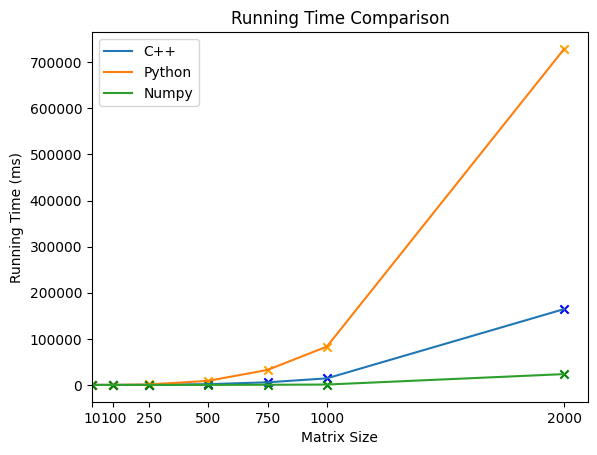

In [25]:
# plot
plt.plot(matrix_size, c_plus_plus, label='C++')
plt.plot(matrix_size, python, label='Python')
plt.plot(matrix_size, numpy, label='Numpy')
# scatter
plt.scatter(matrix_size, c_plus_plus, color='blue', marker='x')
plt.scatter(matrix_size, python, color='orange', marker='x')
plt.scatter(matrix_size, numpy, color='green', marker='x')
# customize
plt.xticks(matrix_size)
plt.xlim(min(matrix_size), max(matrix_size)+100)
plt.xlabel('Matrix Size')
plt.ylabel('Running Time (ms)')
plt.title('Running Time Comparison')
# finish
plt.legend()
plt.show()

# 5. Conclusion <a class="anchor" id="c5"></a>
- The running time of `numpy` is the fastest, followed by `C++` and `Python`.
- The running time of `numpy` is the fastest because it is written in `C++` and `Fortran` and it is optimized for scientific computing.
- The running time of `C++` is faster than `Python` because `C++` is a compiled language while `Python` is an interpreted language.
---

# <center>END</center>